비트연산

In [5]:
import numpy as np
import pandas as pd
import cv2
import os
os.chdir('C:/Users/edu/Desktop/HyunSuk/files')

In [39]:
import cv2
import numpy as np

src1 = cv2.imread('./data/lena.jpg')
src2 = cv2.imread('./data/opencv_logo.png')
cv2.imshow('src2',  src2)

#1
rows,cols,channels = src2.shape
roi = src1[0:rows, 0:cols]

#2
gray = cv2.cvtColor(src2,cv2.COLOR_BGR2GRAY)
##ret, mask = cv2.threshold(gray, 160, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
cv2.imshow('mask',  mask)
cv2.imshow('mask_inv',  mask_inv)

#3
src1_bg = cv2.bitwise_and(roi, roi, mask = mask)
cv2.imshow('src1_bg',  src1_bg)

#4
src2_fg = cv2.bitwise_and(src2, src2, mask = mask_inv)
cv2.imshow('src2_fg',  src2_fg)

#5
##dst = cv2.add(src1_bg, src2_fg)
dst = cv2.bitwise_or(src1_bg, src2_fg)
cv2.imshow('dst',  dst)

#6
src1[0:rows, 0:cols] = dst

cv2.imshow('result',src1)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [41]:
# 0419.py
import cv2
import numpy as np

src1 = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)
src2 = np.zeros(shape=(512,512), dtype=np.uint8)+255

dst1 = 255 - src1
dst2 = cv2.subtract(src2, src1)
dst3 = cv2.compare(dst1, dst2, cv2.CMP_NE) # cv2.CMP_EQ
n    = cv2.countNonZero(dst3)
print('n = ', n)

cv2.imshow('dst1',  dst1)
cv2.imshow('dst2',  dst2)
cv2.waitKey()    
cv2.destroyAllWindows()


n =  0


In [103]:
# 0420.py
import cv2
import numpy as np

src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)

minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(src)
print('src:', minVal, maxVal, minLoc, maxLoc)

dst = cv2.normalize(src, None, 100, 200, cv2.NORM_MINMAX)
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(dst)
print('dst:', minVal, maxVal, minLoc, maxLoc)

cv2.imshow('dst',  dst)
cv2.waitKey()    
cv2.destroyAllWindows()


src: 18.0 248.0 (265, 198) (116, 273)
dst: 100.0 200.0 (265, 198) (116, 273)


In [71]:
# 0421.py
import cv2
import numpy as np
import time

dst = np.full((512,512,3), (255, 255, 255), dtype= np.uint8)
nPoints = 100
pts = np.zeros((1, nPoints, 2), dtype=np.uint16)

cv2.setRNGSeed(int(time.time()))
cv2.randu(pts, (0, 0), (512, 512))
            
# draw points
for k in range(nPoints):
    x, y = pts[0, k][:] # pts[0, k, :]
    cv2.circle(dst,(x,y),radius=5,color=(0,0,255),thickness=-1)
    
cv2.imshow('dst',  dst)
cv2.waitKey()    
cv2.destroyAllWindows()


In [76]:
# 0422.py
import cv2
import numpy as np
import time

dst = np.full((512,512,3), (255, 255, 255), dtype= np.uint8)
nPoints = 100
pts = np.zeros((1, nPoints, 2), dtype=np.uint16)

cv2.setRNGSeed(int(time.time()))
cv2.randn(pts, mean=(256, 256), stddev=(50, 50))
            
# draw points
for k in range(nPoints):
    x, y = pts[0][k, :] # pts[0, k, :]
    cv2.circle(dst,(x,y),radius=5,color=(0,0,255),thickness=-1)
    
cv2.imshow('dst', dst)                
cv2.waitKey()    
cv2.destroyAllWindows()


In [79]:
# 0501.py
import cv2
import numpy as np
src = cv2.imread('./data/heart10.jpg', cv2.IMREAD_GRAYSCALE)
cv2.imshow('src',  src)

ret, dst = cv2.threshold(src, 120, 255, cv2.THRESH_BINARY)
print('ret=', ret)
cv2.imshow('dst',  dst)

ret2, dst2 = cv2.threshold(src, 200, 255,
                             cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print('ret2=', ret2)
cv2.imshow('dst2',  dst2)

cv2.waitKey()    
cv2.destroyAllWindows()


ret= 120.0
ret2= 175.0


In [80]:
# 0502.py
import cv2
import numpy as np
src = cv2.imread('./data/srcThreshold.png', cv2.IMREAD_GRAYSCALE)
cv2.imshow('src',  src)

ret, dst = cv2.threshold(src, 0, 255,
                             cv2.THRESH_BINARY+cv2.THRESH_OTSU)
cv2.imshow('dst',  dst)

dst2 = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                            cv2.THRESH_BINARY, 51, 7)
cv2.imshow('dst2',  dst2)

dst3 = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                            cv2.THRESH_BINARY, 51, 7)
cv2.imshow('dst3',  dst3)

cv2.waitKey()    
cv2.destroyAllWindows()

0

In [120]:
#src=np.array([[0,0,0,7],[1,1,3,5],[6,1,1,3],[4,3,1,7]],dtype=np.uint8)
hist1=cv2.calcHist(images=[src],channels=[0],mask=None,histSize=[4],ranges=[0,256])
print('hist1=',hist1)
hist2=cv2.calcHist(images=[src],channels=[0],mask=None,histSize=[4],ranges=[0,4])
print('hist2= ',hist2)

hist1= [[ 42388.]
 [ 85250.]
 [109930.]
 [ 24576.]]
hist2=  [[0.]
 [0.]
 [0.]
 [0.]]


In [121]:
hist1

array([[ 42388.],
       [ 85250.],
       [109930.],
       [ 24576.]], dtype=float32)

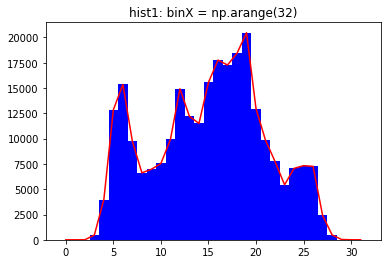

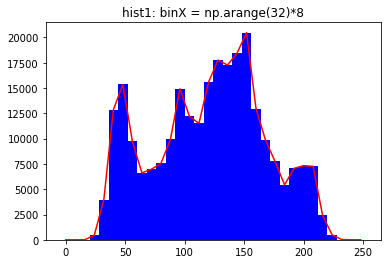

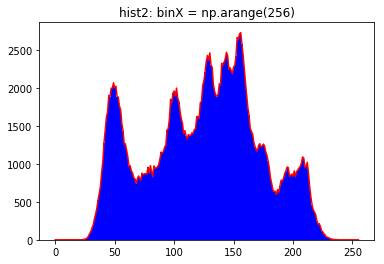

In [119]:
# 0504.py
import cv2
import numpy as np
from   matplotlib import pyplot as plt
%matplotlib inline
src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)

hist1 = cv2.calcHist(images=[src], channels=[0], mask=None,
                    histSize=[32], ranges=[0, 256])

hist2 = cv2.calcHist(images=[src], channels=[0], mask=None,
                    histSize=[256], ranges=[0, 256])
#1
hist1 = hist1.flatten()
hist2 = hist2.flatten()

#2
plt.title('hist1: binX = np.arange(32)')
plt.plot(hist1, color='r')
binX = np.arange(32)

plt.bar(binX, hist1, width=1, color='b')
plt.show()

#3
plt.title('hist1: binX = np.arange(32)*8')
binX = np.arange(32)*8
plt.plot(binX, hist1, color='r')
plt.bar(binX, hist1, width=8, color='b')
plt.show()

#4
plt.title('hist2: binX = np.arange(256)')
plt.plot(hist2, color='r')
binX = np.arange(256)
plt.bar(binX, hist2, width=1, color='b')
plt.show()


In [141]:
def stretch(img):
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    g_min=gray.min()
    g_max=gray.max()
    img=((img-g_min)/(g_max-g_min))*255
    img=np.uint8(img)
    return img

<BarContainer object of 256 artists>

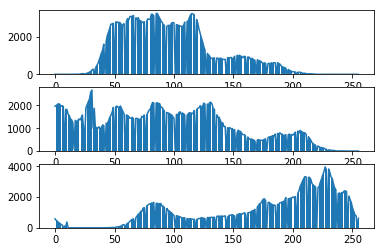

In [143]:
src = cv2.imread('./data/lena.jpg')
src=stretch(src)
hist_b=cv2.calcHist(images=[src], channels=[0], mask=None,
                    histSize=[256], ranges=[0, 256])
hist_g=cv2.calcHist(images=[src],channels=[1],mask=None,histSize=[256],ranges=[0,256])
hist_r=cv2.calcHist(images=[src],channels=[2],mask=None,histSize=[256],ranges=[0,256])
hist_b=hist_b.reshape(-1)
hist_g=hist_g.reshape(-1)
hist_r=hist_r.reshape(-1)
fig,axes=plt.subplots(3,1)
axes[0].plot(hist_b)
axes[0].bar(range(256),hist_b)
axes[1].plot(hist_g)
axes[1].bar(range(256),hist_g)
axes[2].plot(hist_r)
axes[2].bar(range(256),hist_r)
cv2.imshow('img',img)
cv2.waitKey()
cv2.AllWindows()


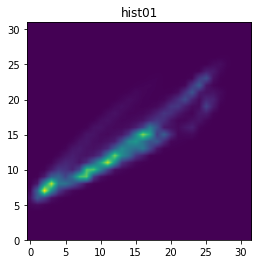

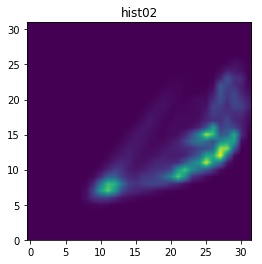

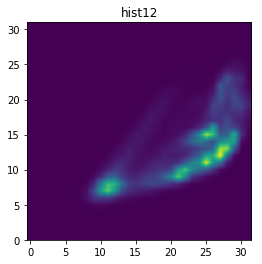

In [165]:
# 0506.py
import cv2
from   matplotlib import pyplot as plt

bgr = cv2.imread('./data/lena.jpg')
##hsv    = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)

#1
hist01 = cv2.calcHist([bgr], [0,1], None,
	[32, 32], [0, 256, 0, 256])
##cv2.normalize(hist01, hist01, 0, 1, cv2.NORM_MINMAX)
##fig = plt.figure()
##fig.canvas.set_window_title('2D Histogram')

plt.title('hist01')
plt.ylim(0, 31)
plt.imshow(hist01, interpolation = "bilinear")
plt.show()

#2
hist02 = cv2.calcHist([bgr], [0,2], None,
	[32, 32], [0, 256, 0, 256])
plt.title('hist02')
plt.ylim(0, 31)
plt.imshow(hist02, interpolation = "bilinear")
plt.show()

#3
hist12 = cv2.calcHist([bgr], [1,2], None,
	[32, 32], [0, 256, 0, 256])
plt.title('hist12')
plt.ylim(0, 31)
plt.imshow(hist02, interpolation = "bilinear")
plt.show()


In [162]:
hist01.shape

(32, 32)

In [159]:
np.unique([0,1,2,1])

array([0, 1, 2])

In [167]:
import cv2
import numpy as np
src=np.array([[0,0,0,0],[1,1,3,5],[6,1,1,3],[4,3,1,7]],dtype=np.uint8)
dst=cv2.equalizeHist(src)
print('dst =',dst)


dst = [[  0   0   0   0]
 [106 106 170 212]
 [234 106 106 170]
 [191 170 106 255]]
